## PCC103 Métodos Científicos - Exercício Significado Média

Aluno: Marco Aurélio Moura Suriani

In [1]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import copy

## 0) Dados para testes

Serão criadas duas variáveis:
1. **Variável x:** tipo contínua com distribuição normal, $\mu$ = 10.0, $\sigma$ = 2.0, e n = 10000 amostras
 * `random.seed(1)` permite que sempre retorne os mesmos resultados
 * Plot histograma com 100 classes
 
2. **Variável xi:** tipo discreta com distribuição normal, $\mu$ = 10.0, $\sigma$ = 2.0, e n = 10000 amostras
 * Resultado do arredondamento para baixo dos valores de **x** usando `np.floor(x)`
 * Imprime tabela de frequência de cada classe e plot respectivo histograma

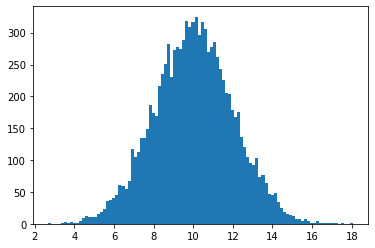

In [2]:
np.random.seed(1)
x = np.random.normal(10.0, 2.0, 10000)

plt.hist(x, 100)
plt.show()

 2  :  1
 3  :  10
 4  :  51
 5  :  164
 6  :  428
 7  :  909
 8  :  1484
 9  :  1915
10  :  1934
11  :  1525
12  :  873
13  :  467
14  :  175
15  :  46
16  :  13
17  :  4
18  :  1


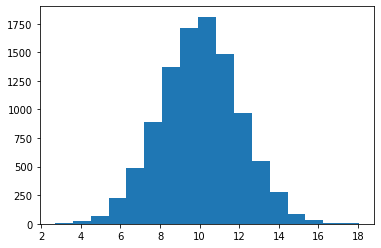

In [3]:
xi = np.array([int(i) for i in np.floor(x)])

for i in range(min(xi), max(xi) + 1):
    print("%2i" % i, " : ", "%i" % sum([j == i for j in xi]))
    
plt.hist(x, max(xi) - min(xi) + 1)
plt.show()

## 1) Média

* Função: `my_mean`
* Testada sobre um vetor com amostras contínuas em distribuição normal (x)
* Comparada com: média da amostra (argumento da função `np.random.normal`) e média do numpy (`np.mean`)

In [4]:
def my_mean(data):
    return sum(data)/len(data)

In [5]:
mean_results = {"amostra": 10.0, "numpy": np.mean(x), "my_mean": my_mean(x)}

print("Média do vetor x em 3 métodos:\n")
# Iterate over key/value pairs in dict and print them
for key, value in mean_results.items():
    print("%7s" % key, ': ', "%.5f" % value)

Média do vetor x em 3 métodos:

amostra :  10.00000
  numpy :  10.01955
my_mean :  10.01955


## 2) Moda

* Função: `my_mode`
* Retorna lista com moda e quantidade de elementos da classe modal
* Testada sobre um vetor com amostras discretas em distribuição normal (xi)
* Comparada com: moda da amostra (calculada manualmente) e moda do scipy (`scipy.stats.mode`)

In [6]:
def my_mode(data):
    freq_table = {}
    
    for d in data:
        if d in freq_table:
            freq_table[d] += 1
        else:
            freq_table[d] = 1
    
    m = [[key, value] for key, value in freq_table.items() if value == max(freq_table.values())]
    
    return m

In [7]:
mode_results = {"amostra": [10, sum([i == 10 for i in xi])], 
                "scipy": [stats.mode(xi)[0][0], stats.mode(xi)[1][0]], 
                "my_mode": my_mode(xi)[0]}

print("Moda do vetor xi em 3 métodos:\n")
# Iterate over key/value pairs in dict and print them
for key, value in mode_results.items():
    print("%7s" % key, ': ', "%i" % value[0], ' , ', "%i" % value[1], ' amostras')

Moda do vetor xi em 3 métodos:

amostra :  10  ,  1934  amostras
  scipy :  10  ,  1934  amostras
my_mode :  10  ,  1934  amostras


## 3) Percentil

* Função: `my_percentile`
* Funções auxiliares: `my_LomutoPartition` e `my_QuickSelect`
* Testada sobre um vetor com amostras contínuas em distribuição normal (x)
* Comparada com: percentil do numpy (`np.percentile`)

In [8]:
def my_LomutoPartition(A, left, right):
    #  Implementação do algoritmo Lomuto Partition
    # Particiona um subarranjo usando o primeiro elemaento como pivô
    # ENTRADAS:
    # Ponteiro para Vetor A com elementos de qualquer datatype
    # Inteiros com o range do subarranjo (left e right)
    # SAÍDA:
    # Vetor A[left ... range] particionado
    # Inteiro s com índice do novo pivô
    
    # Pivô é primeiro elemento 
    p = A[left]
    
    # Índice do novo pivô começa no primeiro elemento
    s = left
    
    # Percorre os elementos do subarranjo
    for i in range (left + 1, right+1):
        # Para cada elemento menor que o pivô
        if (A[i] < p):
            
            # Novo pivô avança uma posição
            s += 1
            
            # Troca elemento atual de posição com pivô atual
            A[s], A[i] = A[i], A[s]
    
    # Troca o pivô inicial com novo pivô
    A[s], A[left] = A[left], A[s]
    
    return s

def my_QuickSelect(A, left, right, k):
    #  Implementação do QUICK SELECT   
    # Seleciona o k-ésimo elemento com o auxílio de um algoritmo de partição
    # ENTRADAS:
    # Ponteiro para Vetor A com elementos de qualquer datatype
    # Inteiros com o range do subarranjo (left e right)
    # Cardinalidade k do elemento a ser selecionado
    # SAÍDA:
    # Elemento selecionado

    # Realiza a Partição de Lomuto
    s = my_LomutoPartition(A, left, right)

    # Se o novo pivô é igual à cardinalidade k, retorne o elemento em tal posição
    if (s == k):
        return A[s]

    # Caso a cardinalidade seja menor que o novo pivô, faça uma recursão
    # atualizando o limite superior para s - 1
    if (k < s):
        return my_QuickSelect(A, left, s - 1, k)
    
    # Caso a cardinalidade seja maior ou igual que o novo pivô, faça uma recursão
    # atualizando o limite inferior para s + 1
    return my_QuickSelect(A, s + 1, right, k)

def my_percentile(arr, p):
    A = copy.copy(arr)
    n = len(A)
    k = (n - 1) * p / 100
    d = k - np.floor(k)

    # Se k for um inteiro, retorne sua posição
    if (d == 0):
        return my_QuickSelect(A, 0, n-1, k)
    else:
        # Caso contrário, pondere
        return (1-d)*my_QuickSelect(A, 0, n-1, np.floor(k)) + (d)*my_QuickSelect(A, 0, n-1, np.ceil(k))

In [9]:
p = 25

percentile_results = {"numpy": np.percentile(x, p), "my_percentile": my_percentile(x, p)}

print("Percentil %i" %p, " do vetor x em 2 métodos:\n")
# Iterate over key/value pairs in dict and print them
for key, value in percentile_results.items():
    print("%13s" % key, ': ', "%.5f" % value)

Percentil 25  do vetor x em 2 métodos:

        numpy :  8.67415
my_percentile :  8.67415


In [10]:
p = 87

percentile_results = {"numpy": np.percentile(x, p), "my_percentile": my_percentile(x, p)}

print("Percentil %i" %p, " do vetor x em 2 métodos:\n")
# Iterate over key/value pairs in dict and print them
for key, value in percentile_results.items():
    print("%13s" % key, ': ', "%.5f" % value)

Percentil 87  do vetor x em 2 métodos:

        numpy :  12.25793
my_percentile :  12.25793


## 4) Mediana

* Função: `my_median`
* Funções auxiliares: `my_percentile`, `my_LomutoPartition` e `my_QuickSelect`
* Testada sobre um vetor com amostras contínuas em distribuição normal (x)
* Comparada com: mediana do numpy (`np.median`)

In [11]:
def my_median(data):
    return my_percentile(data, 50)

In [12]:
median_results = {"numpy": np.median(x), "my_percentile": my_median(x)}

print("Mediana do vetor x em 2 métodos:\n")
# Iterate over key/value pairs in dict and print them
for key, value in median_results.items():
    print("%13s" % key, ': ', "%.5f" % value)

Mediana do vetor x em 2 métodos:

        numpy :  10.01691
my_percentile :  10.01691
